In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
# run this to hide all warnings about ARIMA fails to converge

import warnings
warnings.filterwarnings('ignore')

In [3]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import progressbar
from sklearn.cluster import AgglomerativeClustering as agc
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import time

In [5]:
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# We discard the last 33 rows as all of them are just 0
df_cpu = pd.DataFrame(np_cpu).transpose().iloc[:-33]
df_cpu

,0,1,2,3,4,5,6,7,8,9,...,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475
0,0.253672,0.079161,0.206047,0.663605,0.382621,0.295668,0.184070,0.496593,0.525418,0.290140,...,0.375723,0.408478,0.210300,0.736583,0.197652,0.252940,0.502969,0.491815,0.385068,0.162004
1,0.244409,0.085044,0.196264,0.818703,0.402819,0.297955,0.213957,0.350278,0.573250,0.317034,...,0.470169,0.412815,0.166844,0.809824,0.162657,0.290303,0.412357,0.445945,0.468362,0.334348
2,0.286186,0.126529,0.245121,0.830427,0.411507,0.296759,0.351503,0.293486,0.555317,0.368492,...,0.483236,0.413504,0.164896,0.543337,0.232658,0.270588,0.161209,0.476118,0.486091,0.241277
3,0.282959,0.567100,0.784541,0.805947,0.411052,0.310281,0.368436,0.293222,0.528925,0.279950,...,0.472866,0.433755,0.169487,0.800869,0.217257,0.293129,0.564685,0.748201,0.744447,0.246259
4,0.267864,0.568513,0.625622,0.788383,0.398860,0.354702,0.362917,0.414586,0.548902,0.245887,...,0.470394,0.079542,0.161834,0.829667,0.250794,0.277118,0.516919,0.705893,0.711830,0.307020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,0.360116,0.421885,0.203981,0.233525,0.109446,0.239819,0.250049,0.098761,0.200595,0.136422,...,0.132390,0.272088,0.111850,0.457003,0.303150,0.354244,0.298454,0.205314,0.129465,0.327796
8314,0.362263,0.311366,0.455806,0.245492,0.108742,0.240046,0.206760,0.100170,0.192283,0.124357,...,0.174067,0.255670,0.110919,0.452675,0.357220,0.456430,0.329026,0.185720,0.134255,0.303741
8315,0.353284,0.286414,0.449383,0.255302,0.107698,0.227358,0.175994,0.098761,0.198344,0.128449,...,0.227165,0.192814,0.112557,0.454342,0.332720,0.415568,0.291380,0.180987,0.131710,0.256081
8316,0.336732,0.258560,0.414796,0.196945,0.110738,0.233530,0.108868,0.090715,0.182867,0.114614,...,0.231024,0.166013,0.118202,0.345110,0.178616,0.326134,0.145217,0.162554,0.167205,0.165261


In [6]:
# selected_machines_series is a pd.series of selected_machines

selected_machines_series = pd.read_csv("derived_dataset//df_updated_selected_machines.csv", header = None)[1]
# selected_machines_series = selected_machines_series.drop(selected_machines_series.loc[2875].index)

# drop corrupted
corrupted_list = [2875, 860, 5262, 11031, 3741, 4081, 8082, 7807]

for x in corrupted_list:
    selected_machines_series = selected_machines_series.drop(selected_machines_series.loc[selected_machines_series == x].index[0])
    
selected_machines_series = selected_machines_series.reset_index()[1]
selected_machines_series

0           0
1          22
2          30
3          76
4         100
        ...  
1149    12430
1150    12435
1151    12448
1152    12450
1153    12462
Name: 1, Length: 1154, dtype: int64

In [7]:
# df_selected_machines has the cpu utilisation of all the selected machines

df_selected_machines = df_cpu[selected_machines_series.tolist()]
df_selected_machines

,0,22,30,76,100,114,122,144,145,155,...,12361,12372,12389,12405,12428,12430,12435,12448,12450,12462
0,0.253672,0.459299,0.622072,0.330749,0.220168,0.152069,0.711798,0.227724,0.317993,0.297717,...,0.088041,0.371357,0.117217,0.548113,0.505884,0.436256,0.134071,0.598948,0.582754,0.261476
1,0.244409,0.453434,0.675667,0.507613,0.285341,0.065093,0.709408,0.228947,0.212468,0.244852,...,0.064587,0.365549,0.124368,0.549061,0.476450,0.382123,0.137016,0.689362,0.579644,0.269432
2,0.286186,0.421637,0.605018,0.491187,0.214291,0.093175,0.644269,0.243860,0.251389,0.313728,...,0.078794,0.370688,0.196272,0.558756,0.492287,0.428267,0.143821,0.622141,0.635437,0.266179
3,0.282959,0.497158,0.557888,0.664705,0.190510,0.078452,0.622552,0.233398,0.490127,0.592473,...,0.068959,0.369142,0.794939,0.576169,0.541556,0.445663,0.226476,0.771646,0.865479,0.262912
4,0.267864,0.380239,0.597617,0.549699,0.195829,0.082064,0.667933,0.275764,0.290163,0.449138,...,0.078967,0.395029,0.872176,0.566799,0.502463,0.469505,0.231569,0.770669,0.839107,0.264374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,0.360116,0.261616,0.259299,0.271547,0.340304,0.115849,0.330836,0.068423,0.454061,0.104370,...,0.166423,0.048296,0.300219,0.238479,0.353355,0.294739,0.409451,0.428109,0.418330,0.059045
8314,0.362263,0.265066,0.250470,0.262513,0.318100,0.119249,0.340013,0.067898,0.404284,0.107841,...,0.101496,0.049848,0.241673,0.247112,0.359876,0.334548,0.395918,0.412742,0.426024,0.062034
8315,0.353284,0.249500,0.262219,0.255943,0.337736,0.153545,0.327623,0.067120,0.345439,0.116998,...,0.079332,0.045006,0.302506,0.247651,0.340065,0.320230,0.330966,0.414869,0.421373,0.059858
8316,0.336732,0.255389,0.221502,0.275571,0.239837,0.103407,0.255347,0.068763,0.220582,0.108897,...,0.039880,0.046350,0.230164,0.243069,0.280412,0.279684,0.102817,0.349251,0.420436,0.058733


# All Frameworks

## Correlation Predictions

The proposed framework

In [8]:
def cluster_map(correlation_matrix, number_of_cluster):
    # takes in correlation matrix and creates a map of cluster index to list of machine index in the cluster
    
    machine_index = correlation_matrix.columns
    number_of_machine = len(machine_index)
    
    # computing the clusters
    cluster = agc(n_clusters=number_of_cluster, affinity='euclidean', linkage='ward')
    clustering_output = cluster.fit_predict(correlation_matrix)
    
    # initialising a map for clusters
    cluster_map = {}
    for x in range(0,number_of_cluster):
        cluster_map[x] = []

    # get a map for each cluster
    # key is cluster index; values is list of machines in that cluster
    for x in range(0,number_of_machine):
        cluster_map[clustering_output[x]].append(machine_index[x])
        
    return cluster_map

def get_best_machine(correlation_matrix):
    # takes in the correlation_matrix
    # returns the index of the machine which minimises the correlation between all machines
    
    # Take the sum of the squared correlation of all machines
    # Note that taking the sum penalizes small values and rewards large values
    squared_matrix = (correlation_matrix**2).sum()
    
    return squared_matrix.idxmax()

def get_regression_parameters(cpu_data, best_machine):
    # get the linear regression parameters for each machine wrt the best machine
    # returns a sklearn.linear_model._base.LinearRegression (model)
    
    model_list = []
    for cpu_index in cpu_data.columns:
        X = np.array(cpu_data[best_machine]).reshape(-1,1)
        model = LinearRegression().fit(X, cpu_data[cpu_index])
        model_list.append(model)
        
    return model_list   

def arima_predictions(timeseries, input_arima_order = (3,0,0)):
    # takes in a timeseries
    # outputs a single prediction in the next timestep
    
    timeseries = timeseries.values
    model = ARIMA(timeseries, order = input_arima_order)
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0][0]
    
    return prediction

def get_cluster_predictions(cpu_data, curr_time_segment, cluster_corr_matrix, input_arima_order):
    # takes in information about a cluster 
    # cpu_data is the full length of values of all the timeseries IN THE CLUSTER
    # curr_time_segment is the windowed version of cpu_data
    
    # makes predictions for all machines in cluster at next single timestep
    # returns a map of machine to predictions
    
    # get best machine
    best_machine = get_best_machine(cluster_corr_matrix)
    
    # get_regression_parameters wrt best machine for every machine
    linreg_model_list = get_regression_parameters(curr_time_segment, best_machine)
    
    # make predictions on best machine
    best_machine_prediction = arima_predictions(cpu_data[best_machine], input_arima_order = input_arima_order)
    
    # scale all the other machines to fit the best machine
    cluster_prediction = dict()
    for index, machine_index in enumerate(cpu_data.columns):
        current_prediction = linreg_model_list[index].predict(np.array(best_machine_prediction).reshape(-1,1))[0]
        
        # if the prediction is out of bounds, use arima to predict instead
        if(current_prediction > 1 or current_prediction < 0):
            current_prediction = arima_predictions(cpu_data[machine_index], input_arima_order = input_arima_order)
            
        # print("prediction: ", linreg_model_list[index].predict(np.array(best_machine_prediction).reshape(-1,1))[0])
        cluster_prediction[machine_index] = current_prediction
        
    return cluster_prediction    

def corr_predictions(cpu_data, window = 6, number_of_cluster = 50, start_time = 288, end_time = None, rolling_error_window = 0):

    ''' high level function for making correlation based single-step predictions

        param:  cpu_data:   df with CPU index as columns and time-step as rows, must contain time-step for at least [start_time-3:end_time-2]
                            ARIMA models are trained with all time-steps before the "prediction time-step" i.e. prediction x[n] is made using data from x[:n]
                            Predictions are made for all machines index included in cpu_data, to exclude predicting certain machine index, drop from cpu_data
        param:  window:     window size of rolling correlation function
        param:  number_of_cluster : number of clusters used for clustering per time-step
        param:  start_time, end_time :  prediction is made for from start_time to (end_time - 1) inclusive
                                     :  keep end_time = None to make predictions for the entire length of cpu_data i.e. predictions made from x[start_time:]
        param: rolling_error_window  :  predictions are offset using a rolling error window of size (defined here) using past errors   

    returns : df matrix of prediction with columns as machine and rows as time index
    '''

    rolling_error_multiplier = 0.25
    arima_order = (3,0,0)
    machine_index = cpu_data.columns
    map_min_corr = {}
    number_of_machine = len(cpu_data.columns)
    all_predictions = pd.DataFrame(columns = cpu_data.columns)
    
    # df_rolling_error has the prediction error for the last 5 time-step for each machine
    df_rolling_error = pd.DataFrame(columns = cpu_data.columns)
    
    if end_time == None:
        end_time = len(cpu_data.index) - 1
    
    with progressbar.ProgressBar(max_value = end_time - start_time) as bar:
        for current_time in range(start_time, end_time):
    
            bar.update(current_time-start_time)

            # computing the correlation matrix at current time index
            curr_time_segment = cpu_data.iloc[current_time-window:current_time]
            curr_all_time = cpu_data.iloc[:current_time]
            curr_corr_matrix = curr_time_segment.corr().abs()
            

            # perform clustering at current time index
            cluster = cluster_map(curr_corr_matrix, number_of_cluster = number_of_cluster) 

            # initialise dict for machine to prediction in current timestep
            curr_all_machine_pred = dict()

            for ls_machine_in_cluster in cluster.values():
                # make predictions for all machine in each cluster
                
                
                cluster_predictions = get_cluster_predictions(cpu_data = curr_all_time[ls_machine_in_cluster],
                                                              curr_time_segment = curr_time_segment[ls_machine_in_cluster],
                                                              cluster_corr_matrix = curr_corr_matrix[ls_machine_in_cluster].loc[ls_machine_in_cluster],
                                                              input_arima_order = arima_order)
                
                # curr_all_machine_pred is a dict with key = machine, value = current timestep prediction
                curr_all_machine_pred = {**curr_all_machine_pred, **cluster_predictions}

            if rolling_error_window > 0:
        
                if len(df_rolling_error) == 0:
                    # 1st prediction does not have a rolling error
                    df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time])
                else:
                    
                    # get final predictions by adding in the rolling error
                    df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time]) + rolling_error_multiplier * df_rolling_error.mean()

                # update the rolling error df for next time-step
                df_rolling_error = df_rolling_error.append(cpu_data.iloc[current_time] - df_current_predictions)

                # remove nunwanted history from the rolling error df
                if len(df_rolling_error) > rolling_error_window:
                    df_rolling_error = df_rolling_error.drop(df_rolling_error.index[0])
            
            else:
                df_current_predictions = pd.DataFrame(curr_all_machine_pred, index = [current_time])
                
            all_predictions = all_predictions.append(df_current_predictions, sort = True)
        
    return all_predictions

# Brute Force Framework
Making one model for each time-series

In [9]:
def one_timeseries_one_model(cpu_data, start_time, end_time):

    ''' using one arima model to make predictions for each time-series

        param:  cpu_data:   df with CPU index as columns and time-step as rows, must contain time-step for at least [start_time-3:end_time-2]
                            ARIMA models are trained with all time-steps before the "prediction time-step" i.e. prediction x[n] is made using data from x[:n]
                            Predictions are made for all machines index included in cpu_data, to exclude predicting certain machine index, drop from cpu_data
        param:  start_time, end_time :  prediction is made for from start_time to (end_time - 1) inclusive
                                     :  keep end_time = None to make predictions for the entire length of cpu_data i.e. predictions made from x[start_time:]

    returns : df matrix of prediction with columns as machine and rows as time index
    '''

    input_order = (3,0,0)
    
    # prediction map is the dict for all predictions where the key is the machine index and the value is a list of predictions
    predictions_map = dict()
    with progressbar.ProgressBar(max_value = len(cpu_data.columns)) as bar:     
        
        for number_of_machines, cpu_index in enumerate(cpu_data):
            bar.update(number_of_machines)
            
            temp_predictions = list()
            for current_time in range (start_time, end_time):
                
                model = ARIMA(cpu_data[cpu_index].iloc[:current_time], order = input_order)
                model_fit = model.fit(disp=0)
                output = model_fit.forecast()
                yhat = output[0]
                temp_predictions.append(yhat[0])
                
            predictions_map[cpu_index] = temp_predictions
            
    return pd.DataFrame(predictions_map, columns = cpu_data.columns, index = np.arange(start_time, end_time))  

# Naive Framework
Using lagged version of the time-series as predictions

In [10]:
def lagged_timeseries(cpu_data, start_time, end_time):
    ''' 
    Naive method: Taking the observation from the last time-step as the prediction for the next time-step
    Implementation is just reindexing of the required segment of time-series
    '''
    
    rename_mapping = dict()
    for x in range(start_time, end_time):
        rename_mapping[x-1] = x
    
    return cpu_data.iloc[start_time-1:end_time-1].rename(index = rename_mapping)

# Using MSE clustering and MSE offset
The framework proposed by Tuor

In [132]:
def kmeans_cluster_map(cpu_t, number_of_cluster = 50):
    # takes in cpu at a single time index and creates a map of cluster index to list of machine index in the cluster
    # cpu_t is a pd.series with values of cpu at time t 
    
    # get machine index
    machine_index = cpu_t.columns
    number_of_machine = len(machine_index)
    
    # converting cpu_t to appropriate data structure
    cpu_t = cpu_t.mean().values.reshape(-1,1)
    
    # computing the clusters
    kmeans = KMeans(n_clusters=number_of_cluster, random_state = 0)
    clustering_output = kmeans.fit(cpu_t).labels_
    
    # initialising a map for clusters
    cluster_map = {}
    for x in range(0,number_of_cluster):
        cluster_map[x] = []

    # get a map for each cluster
    # key is cluster index; values is list of machines in that cluster
    for x in range(0,number_of_machine):
        cluster_map[clustering_output[x]].append(machine_index[x])
        
    return cluster_map

def arima_predictions(timeseries, input_arima_order = (3,0,0)):
    # takes in a timeseries
    # outputs a single prediction in the next timestep
    
    timeseries = timeseries.values
    model = ARIMA(timeseries, order = input_arima_order)
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0][0]
    
    return prediction

def mse_cluster_prediction(cpu_data, input_arima_order, past_error):
    # generate predictions for all machines in cluster at next single timestep
    # returns a map of machine to predictions
    
    # get generalisation model (analogous to best_machine in correlation_prediction)
    general_model = cpu_data.mean(axis = 1)
    
    # make predictions on best machine
    general_model_prediction = arima_predictions(general_model, input_arima_order = input_arima_order)
    
    # get the rolling_error
    rolling_error = past_error.mean()
    
    # scale general_model to fit all the other machines
    cluster_prediction = dict()
    for index, machine_index in enumerate(cpu_data.columns):
        cluster_prediction[machine_index] = general_model_prediction + rolling_error[machine_index]
        
    return cluster_prediction, general_model_prediction

def mse_predictions(cpu_data, number_of_cluster = 50, start_time = 288, end_time = None, past_error_range = 1, rolling_cluster_window = 3):

    ''' high level function for making predictons using the tuor framework

        param:  cpu_data:   df with CPU index as columns and time-step as rows, must contain time-step for at least [start_time-3:end_time-2]
                            ARIMA models are trained with all time-steps before the "prediction time-step" i.e. prediction x[n] is made using data from x[:n]
                            Predictions are made for all machines index included in cpu_data, to exclude predicting certain machine index, drop from cpu_data
        param:  rolling_cluster_window:     number of past values to be considered for clustering at each time-step
        param:  number_of_cluster : number of clusters used for clustering per time-step
        param:  start_time, end_time :  prediction is made for from start_time to (end_time - 1) inclusive
                                     :  keep end_time = None to make predictions for the entire length of cpu_data i.e. predictions made from x[start_time:]
        param: past_error_range  :  predictions are offset using a rolling error window of size (defined here) using past errors   

    returns : df matrix of prediction with columns as machine and rows as time index
    '''

    arima_order = (3,0,0)
    machine_index = cpu_data.columns
    number_of_machine = len(cpu_data.columns)
    all_predictions = pd.DataFrame(columns = cpu_data.columns)
    df_past_error = pd.DataFrame(0, columns = cpu_data.columns, index = np.arange(0,past_error_range))
    
    if end_time == None:
        end_time = len(cpu_data.index)
    
    with progressbar.ProgressBar(max_value = end_time-start_time) as bar:
        for current_time in range(start_time, end_time):
    
            bar.update(current_time-start_time)

            # perform clustering at (current time - 1) index
            # note clustering is only done using last "rolling_cluster_window" points
            cluster = kmeans_cluster_map(cpu_data.iloc[current_time - rolling_cluster_window: current_time], 
                                         number_of_cluster = number_of_cluster)

            # initialise dict for machine to prediction in current timestep
            curr_all_machine_pred = {}
            curr_general_pred = {}

            for ls_machine_in_cluster in cluster.values():
                
                # make predictions for all machine in each cluster
                cluster_predictions, general_prediction = mse_cluster_prediction(cpu_data = cpu_data[ls_machine_in_cluster], 
                                                             input_arima_order = (3,0,0), 
                                                             past_error = df_past_error[ls_machine_in_cluster])
                
                # curr_all_machine_pred is a dict with key = machine, value = current timestep prediction
                curr_all_machine_pred = {**curr_all_machine_pred, **cluster_predictions}
                
                for machine_index in ls_machine_in_cluster:
                    curr_general_pred[machine_index] = general_prediction

            # update df_past_error with most updated time index
            # start by getting the current error
            curr_all_machine_error = cpu_data.iloc[current_time] - pd.DataFrame(curr_general_pred, index = [current_time])
            
            df_past_error = df_past_error.append(curr_all_machine_error, 
                                                 ignore_index = True)
            df_past_error = df_past_error.drop(0).reset_index().drop("index", axis = 1)
            
            # append the current predicition to all the predictions
            current_df = pd.DataFrame(curr_all_machine_pred, index = [current_time])
            
            all_predictions = all_predictions.append(current_df, sort = True)
        
    return all_predictions

# All Validation

In [61]:
# start_day gives the starting day out of 29 days
# test_length gives the number of predections to make

start_day_ls = [5,10,15,20]
test_length = 100

number_of_predictions = test_length * len(start_day_ls) * len(df_selected_machines.columns)

# Brute Force Method

In [62]:
# running tests for different time segments
brute_force_ls = list()

# getting start time of execution
brute_force_start_time = time.time()
    
for start_day in start_day_ls:
    # using different start times
    temp_brute_force = one_timeseries_one_model(df_selected_machines, 
                                                288*start_day, 
                                                288*start_day+test_length)
    
    brute_force_ls.append(temp_brute_force)

# getting end time of execution
brute_force_end_time = time.time()

100% (1154 of 1154) |####################| Elapsed Time: 2:53:36 Time:  2:53:36
100% (1154 of 1154) |####################| Elapsed Time: 4:22:26 Time:  4:22:26
100% (1154 of 1154) |####################| Elapsed Time: 5:40:17 Time:  5:40:17
100% (1154 of 1154) |####################| Elapsed Time: 6:42:44 Time:  6:42:44


In [63]:
# calculate top
brute_force_top = (brute_force_end_time - brute_force_start_time)/number_of_predictions

# getting mse for brute_force
brute_force_mse_ls = []

for counter, brute_force_predictions in enumerate(brute_force_ls):
    actual_matrix = df_selected_machines.iloc[288*start_day_ls[counter]:288*start_day_ls[counter]+test_length]
    mse_ls = (brute_force_predictions - actual_matrix)**2
    
    brute_force_mse_ls = brute_force_mse_ls + mse_ls.stack().tolist()

brute_force_mse = np.mean(brute_force_mse_ls)
brute_force_std = np.std(brute_force_mse_ls)

In [117]:
for counter, predictions in enumerate(brute_force_ls):
    predictions.to_csv("derived_dataset//brute_force_predictions_" + str(counter) + ".csv", header = None)

In [64]:
brute_force_top

0.15326327534079345

In [65]:
brute_force_mse

0.0008757054185510518

In [66]:
brute_force_std

0.003024364002656771

# Correlation Prediction with Rolling Error

In [79]:
# running tests for different time segments
corr_rolling_error_ls = list()

# getting start time of execution
corr_rolling_error_start_time = time.time()
    
for start_day in start_day_ls:
    # using different start times
    temp_corr_rolling_error = corr_predictions(df_selected_machines, 
                                                window = 6, 
                                                number_of_cluster = 50, 
                                                start_time = 288*start_day, 
                                                end_time = 288*start_day+test_length,
                                                rolling_error_window = 5)
    
    corr_rolling_error_ls.append(temp_corr_rolling_error)

# getting end time of execution
corr_rolling_error_end_time = time.time()

100% (100 of 100) |######################| Elapsed Time: 0:13:01 Time:  0:13:01
100% (100 of 100) |######################| Elapsed Time: 0:17:17 Time:  0:17:17
100% (100 of 100) |######################| Elapsed Time: 0:21:24 Time:  0:21:24
100% (100 of 100) |######################| Elapsed Time: 0:23:14 Time:  0:23:14


In [80]:
# calculate top
corr_rolling_error_top = (corr_rolling_error_end_time - corr_rolling_error_start_time)/number_of_predictions

# getting mse for corr_rolling_error
corr_rolling_error_mse_ls = []

for counter, corr_rolling_error_predictions in enumerate(corr_rolling_error_ls):
    actual_matrix = df_selected_machines.iloc[288*start_day_ls[counter]:288*start_day_ls[counter]+test_length]
    mse_ls = (corr_rolling_error_predictions - actual_matrix)**2
    
    corr_rolling_error_mse_ls = corr_rolling_error_mse_ls + mse_ls.stack().tolist()

corr_rolling_error_mse = np.mean(corr_rolling_error_mse_ls)
corr_rolling_error_std = np.std(corr_rolling_error_mse_ls)

In [118]:
for counter, predictions in enumerate(corr_rolling_error_ls):
    predictions.to_csv("derived_dataset//corr_rolling_error_predictions_" + str(counter) + ".csv", header = None)

In [87]:
corr_rolling_error_top

0.00974734941894508

In [88]:
corr_rolling_error_mse

0.002032627550673962

In [89]:
corr_rolling_error_std

0.016026144623616824

# Correlation Prediction without Rolling Error

In [72]:
# running tests for different time segments
corr_no_rolling_error_ls = list()

# getting start time of execution
corr_no_rolling_error_start_time = time.time()
    
for start_day in start_day_ls:
    # using different start times
    temp_corr_no_rolling_error = corr_predictions(df_selected_machines, 
                                                window = 6, 
                                                number_of_cluster = 50, 
                                                start_time = 288*start_day, 
                                                end_time = 288*start_day+test_length,
                                                rolling_error_window = 5)
    
    corr_no_rolling_error_ls.append(temp_corr_no_rolling_error)

# getting end time of execution
corr_no_rolling_error_end_time = time.time()

100% (100 of 100) |######################| Elapsed Time: 0:13:05 Time:  0:13:05
100% (100 of 100) |######################| Elapsed Time: 0:17:17 Time:  0:17:17
100% (100 of 100) |######################| Elapsed Time: 0:21:24 Time:  0:21:24
100% (100 of 100) |######################| Elapsed Time: 0:22:57 Time:  0:22:57


In [73]:
# calculate top
corr_no_rolling_error_top = (corr_no_rolling_error_end_time - corr_no_rolling_error_start_time)/number_of_predictions

# getting mse for corr_no_rolling_error
corr_no_rolling_error_mse_ls = []

for counter, corr_no_rolling_error_predictions in enumerate(corr_no_rolling_error_ls):
    actual_matrix = df_selected_machines.iloc[288*start_day_ls[counter]:288*start_day_ls[counter]+test_length]
    mse_ls = (corr_no_rolling_error_predictions - actual_matrix)**2
    
    corr_no_rolling_error_mse_ls = corr_no_rolling_error_mse_ls + mse_ls.stack().tolist()

corr_no_rolling_error_mse = np.mean(corr_no_rolling_error_mse_ls)
corr_no_rolling_error_std = np.std(corr_no_rolling_error_mse_ls)

In [119]:
for counter, predictions in enumerate(corr_no_rolling_error_ls):
    predictions.to_csv("derived_dataset//corr_no_rolling_error_predictions_" + str(counter) + ".csv", header = None)

In [74]:
corr_no_rolling_error_top

0.009716557771019135

In [75]:
corr_no_rolling_error_mse

0.002032627550673962

In [76]:
corr_no_rolling_error_std

0.016026144623616824

# Naive Method

In [67]:
# running tests for different time segments
naive_ls = list()

# getting start time of execution
naive_start_time = time.time()
    
for start_day in start_day_ls:
    # using different start times
    temp_naive = lagged_timeseries(df_selected_machines, 
                                   288*start_day,
                                   288*start_day+test_length)
    
    naive_ls.append(temp_naive)

# getting end time of execution
naive_end_time = time.time()

In [68]:
# calculate top
naive_top = (naive_end_time - naive_start_time)/number_of_predictions

# getting mse for naive
naive_mse_ls = []

for counter, naive_predictions in enumerate(naive_ls):
    actual_matrix = df_selected_machines.iloc[288*start_day_ls[counter]:288*start_day_ls[counter]+test_length]
    mse_ls = (naive_predictions - actual_matrix)**2
    
    naive_mse_ls = naive_mse_ls + mse_ls.stack().tolist()

naive_mse = np.mean(naive_mse_ls)
naive_std = np.std(naive_mse_ls)

In [120]:
for counter, predictions in enumerate(naive_ls):
    predictions.to_csv("derived_dataset//naive_predictions_" + str(counter) + ".csv", header = None)

In [69]:
naive_top

1.3814951766095087e-08

In [70]:
naive_mse

0.0009493908204448404

In [71]:
naive_std

0.003337788461990313

# MSE Predictions

In [133]:
# running tests for different time segments
tuor_ls = list()

# getting start time of execution
tuor_start_time = time.time()
    
for start_day in start_day_ls:
    # using different start times
    temp_tuor = mse_predictions(df_selected_machines, 
                       start_time = 288*start_day, 
                       end_time = 288*start_day+test_length)
    
    tuor_ls.append(temp_tuor)

# getting end time of execution
tuor_end_time = time.time()

100% (100 of 100) |######################| Elapsed Time: 0:20:43 Time:  0:20:43
100% (100 of 100) |######################| Elapsed Time: 0:21:12 Time:  0:21:12
100% (100 of 100) |######################| Elapsed Time: 0:20:42 Time:  0:20:42
100% (100 of 100) |######################| Elapsed Time: 0:20:02 Time:  0:20:02


In [134]:
# calculate top
tuor_top = (tuor_end_time - tuor_start_time)/number_of_predictions

# getting mse for tuor
tuor_mse_ls = []

for counter, tuor_predictions in enumerate(tuor_ls):
    actual_matrix = df_selected_machines.iloc[288*start_day_ls[counter]:288*start_day_ls[counter]+test_length]
    mse_ls = (tuor_predictions - actual_matrix)**2
    
    tuor_mse_ls = tuor_mse_ls + mse_ls.stack().tolist()

tuor_mse = np.mean(tuor_mse_ls)
tuor_std = np.std(tuor_mse_ls)

In [135]:
for counter, predictions in enumerate(tuor_ls):
    predictions.to_csv("derived_dataset//tuor_predictions_" + str(counter) + ".csv", header = None)

In [136]:
tuor_top

0.010748254358251958

In [137]:
tuor_mse

0.001900618201180679

In [138]:
tuor_std

0.007907961177442567

# Compiling Results

In [139]:
# compiling results
results_mapping = dict()
results_mapping["Naive"] = [naive_mse, naive_std, naive_top]
results_mapping["Brute Force"] = [brute_force_mse, brute_force_std, brute_force_top]
results_mapping["Correlation without ECR"] = [corr_no_rolling_error_mse, corr_no_rolling_error_std, corr_no_rolling_error_top]
results_mapping["Correlation with ECR"] = [corr_rolling_error_mse, corr_rolling_error_std, corr_rolling_error_top]
results_mapping["Tuor"] = [tuor_mse, tuor_std, tuor_top]

results_index = ["MSE", "Error Std", "TOP"]
df_results = pd.DataFrame(results_mapping, index = results_index).transpose()

In [140]:
df_results

,MSE,Error Std,TOP
Naive,0.000949,0.003338,1.381495e-08
Brute Force,0.000876,0.003024,1.532633e-01
Correlation without ECR,0.002033,0.016026,9.716558e-03
Correlation with ECR,0.002033,0.016026,9.747349e-03
Tuor,0.001901,0.007908,1.074825e-02


In [141]:
df_results.to_csv("derived_dataset//results.csv")

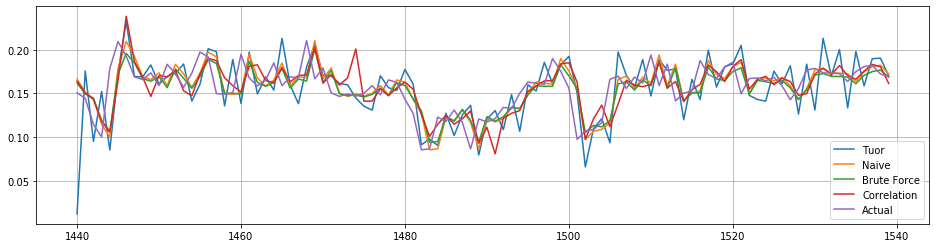

In [144]:
# framework_ls[time_segment][machine_index]

time_segment = 0
machine_index = 0

plt.figure(figsize = (16,4))
plt.plot(tuor_ls[time_segment][machine_index], label = "Tuor")
plt.plot(naive_ls[time_segment][machine_index], label = "Naive")
plt.plot(brute_force_ls[time_segment][machine_index], label = "Brute Force")
plt.plot(corr_no_rolling_error_ls[time_segment][machine_index], label = "Correlation")
plt.plot(df_cpu[machine_index].iloc[tuor_ls[time_segment][machine_index].index], label = "Actual")
plt.legend()
plt.grid()

In [111]:
# plt.figure(figsize = (16,4))
# plt.plot(tuor_ls[][0], label = "Tuor")
# plt.plot(naive_ls[][0], label = "Naive")
# plt.plot(corr_no_rolling_error_ls[0][0], label = "Correlation")
# plt.plot(df_cpu[0].iloc[1440:1540], label = "Actual")
# plt.legend()
# plt.grid()

2880   -0.004550
2881    0.033050
2882    0.069140
2883    0.019731
2884    0.018452
          ...   
2975    0.029554
2976    0.034509
2977    0.030207
2978    0.044084
2979    0.034387
Name: 0, Length: 100, dtype: float64